In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd 

alumno_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Alumno.csv', index_col=0)
tabla_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Tabla.csv', index_col=0)
depto_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Depto.csv', index_col=0)
escuela_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Escuela.csv', index_col=0)
provincia_df = pd.read_csv('/content/drive/MyDrive/Hackaton/clean-data/Provincia.csv', index_col=0)

/usr/local/lib/python3.6/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (3,4,5,6,7) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)
/usr/local/lib/python3.6/dist-packages/numpy/lib/arraysetops.py:580: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  mask |= (ar1 == a)


In [3]:
df = tabla_df.copy()

In [4]:
import numpy as np


df = df.replace('nc', np.nan)
df.isnull().sum()

escuela_id                               0
id                                       0
sexo                                820594
indice_socioeconomico               597777
nivel_desemp_matematica             723968
nivel_desemp_lengua                 739481
nivel_desemp_ciencias_sociales      742111
nivel_desemp_ciencias_naturales     783195
ponderador_lengua                   139264
ponderador_matematica               108978
ponderador_ciencias_naturales       103320
ponderador_ciencias_sociales         79286
tiene_notebook                     1079425
tiene_pc                           1079425
tiene_tablet                       1079425
tiene_celular                      1079425
tiene_smartphone                   1079425
tiene_consola                      1079425
tiene_smarttv                      1079425
tiene_cable                        1079425
repeticion_primaria                 750457
repeticion_secundaria              1773580
nivel_id                                 0
year_id    

In [5]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

**KMeans clustering usando Columnas**

*   indice_socioeconomico
*   indice_socioeconomico_medio_cat
*   indice_socioeconomico_medio
*   subvencion
*   gestion



In [6]:
df.indice_socioeconomico_medio.describe()

count    1.833033e+06
mean     1.975661e+00
std      4.672732e-01
min     -1.000000e+00
25%      1.797753e+00
50%      1.988636e+00
75%      2.205882e+00
max      3.000000e+00
Name: indice_socioeconomico_medio, dtype: float64

In [12]:
test_df = df.loc[:, ['indice_socioeconomico', 'indice_socioeconomico_medio', 'indice_socioeconomico_medio_cat', 'subvencion', 'gestion']]

In [32]:
test_df

,indice_socioeconomico,indice_socioeconomico_medio,indice_socioeconomico_medio_cat,subvencion,gestion
1,2,-0.006058,2,1,1
2,1,0.551859,2,1,1
3,2,-0.585053,1,2,0
4,1,-0.438963,1,2,0
5,1,0.551859,2,1,1
...,...,...,...,...,...
1833029,2,2.363106,2,1,1
1833030,1,1.804986,2,1,1
1833031,2,0.462839,2,1,1
1833032,1,0.462839,2,1,1


In [11]:
test_df.indice_socioeconomico_medio.describe()

count    1.810962e+06
mean    -4.621593e-14
std      1.000000e+00
min     -3.026742e+00
25%     -6.208817e-01
50%     -3.567246e-02
75%      5.940264e-01
max      2.955397e+00
Name: indice_socioeconomico_medio, dtype: float64

Get rid of rows with test_df.indice_socioeconomico_medio == -1 (-1 represents nan) We lose 1.7% of the rows

In [14]:
percent = test_df[test_df.indice_socioeconomico_medio == -1].count()[4]/test_df.count()[0]
test_df = test_df[test_df.indice_socioeconomico_medio != -1]

In [15]:
scaler = StandardScaler()
test_df['indice_socioeconomico_medio'] = scaler.fit_transform(test_df['indice_socioeconomico_medio'].values.reshape(-1, 1))

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


**nan = -1,
Yes aid = 1,
No aid = 2**

In [17]:
%%capture
test_df.subvencion[test_df.subvencion.isnull()] = -1
test_df.subvencion[test_df.subvencion == 'Sin información'] = -1
test_df.subvencion[test_df.subvencion == 'Subvención Total'] = 1
test_df.subvencion[test_df.subvencion == 'Más de 75% y hasta 99%'] = 1
test_df.subvencion[test_df.subvencion == 'Más de 50% y hasta 75%'] = 1
test_df.subvencion[test_df.subvencion == 'Más de 25% y hasta 50%'] = 1
test_df.subvencion[test_df.subvencion == 'Hasta 25%'] = 1
test_df.subvencion[test_df.subvencion == 'Parcial'] = 1
test_df.subvencion[test_df.subvencion == 'No'] = 2
test_df.subvencion[test_df.subvencion == 'No corresponde'] = 2

In [19]:
%%capture
test_df.gestion[test_df.gestion == 'estatal'] = 0
test_df.gestion[test_df.gestion == 'privada'] = 1
test_df.gestion[test_df.gestion == 'social/cooperativa'] = 2

In [20]:
test_df[test_df.gestion == 2].count()

indice_socioeconomico              507
indice_socioeconomico_medio        750
indice_socioeconomico_medio_cat    750
subvencion                         750
gestion                            750
dtype: int64

**Remove all records that gestion == social/cooperativa, we only lose 750**

In [21]:
test_df = test_df[test_df.gestion != 2]

In [22]:
%%capture
test_df.indice_socioeconomico[test_df.indice_socioeconomico.isnull()] = -1
test_df.indice_socioeconomico[test_df.indice_socioeconomico == 'bajo'] = 0
test_df.indice_socioeconomico[test_df.indice_socioeconomico == 'medio'] = 1
test_df.indice_socioeconomico[test_df.indice_socioeconomico == 'alto'] = 2

In [23]:
%%capture
test_df.indice_socioeconomico_medio_cat[test_df.indice_socioeconomico_medio_cat.isnull()] = -1
test_df.indice_socioeconomico_medio_cat[test_df.indice_socioeconomico_medio_cat == 'tercil_bajo'] = 0
test_df.indice_socioeconomico_medio_cat[test_df.indice_socioeconomico_medio_cat == 'tercil_medio'] = 1
test_df.indice_socioeconomico_medio_cat[test_df.indice_socioeconomico_medio_cat == 'tercil_alto'] = 2

In [ ]:
df.count()

**ICSE** – Índice de Contexto Social de la Educación: Índice de clasificación de unidades geográficas en función de las condiciones
de vida y situación de vulnerabilidad de los hogares con residentes en edad escolar. Este índice permite describir el nivel de
vulnerabilidad del radio censal en el cual se ubican las escuelas.

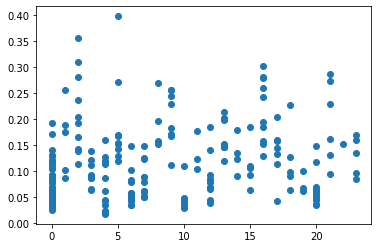

In [ ]:
depto_df[depto_df.tasa_con_nbi != -1].sort_values(by=['tasa_con_nbi'])

test = depto_df[depto_df.tasa_con_nbi != -1]
plt.scatter(test.provincia_id, test.tasa_con_nbi )

In [ ]:
provincia_df

,id,name
1,0,Buenos Aires
2,1,Catamarca
3,2,Chaco
4,3,Chubut
5,4,Ciudad de Buenos Aires
6,5,Corrientes
7,6,Córdoba
8,7,Entre Ríos
9,8,Formosa
10,9,Jujuy


**KMEANS clustering**

In [24]:
clusters = KMeans(n_clusters=3)

In [25]:
clusters.fit(test_df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [26]:
first = test_df[clusters.labels_ == 0]
second = test_df[clusters.labels_ == 1]
third = test_df[clusters.labels_ == 2]

In [27]:
first.indice_socioeconomico_medio.describe()

count    519155.000000
mean          0.185913
std           0.784477
min          -1.071043
25%          -0.409556
50%           0.041022
75%           0.622363
max           2.955397
Name: indice_socioeconomico_medio, dtype: float64

In [28]:
second.indice_socioeconomico_medio.describe()

count    586121.000000
mean          0.835676
std           0.687614
min          -0.890264
25%           0.271104
50%           0.676487
75%           1.305152
max           2.955397
Name: indice_socioeconomico_medio, dtype: float64

In [29]:
third.indice_socioeconomico_medio.describe()

count    704936.000000
mean         -0.830846
std           0.652025
min          -3.026742
25%          -1.167428
50%          -0.683224
75%          -0.334779
max          -0.035672
Name: indice_socioeconomico_medio, dtype: float64

(array([ 2690., 12559., 14287., 16527., 17427., 18535., 21400., 20529.,
        22840., 20872., 22842., 21108., 37161., 14802., 21494., 20428.,
        21345., 18425., 16905., 13697., 13258., 12123., 11269., 10106.,
         8418.,  9882.,  7316.,  7396.,  6244.,  6134.,  5931.,  5962.,
         4351.,  4566.,  3777.,  3931.,  2689.,  3628.,  2373.,  2488.,
         2443.,  2160.,  1892.,  1591.,   940.,  1006.,   690.,   202.,
          171.,   345.]),
 array([-1.07104263, -0.99051384, -0.90998505, -0.82945625, -0.74892746,
        -0.66839867, -0.58786988, -0.50734109, -0.4268123 , -0.34628351,
        -0.26575472, -0.18522593, -0.10469713, -0.02416834,  0.05636045,
         0.13688924,  0.21741803,  0.29794682,  0.37847561,  0.4590044 ,
         0.53953319,  0.62006198,  0.70059078,  0.78111957,  0.86164836,
         0.94217715,  1.02270594,  1.10323473,  1.18376352,  1.26429231,
         1.3448211 ,  1.42534989,  1.50587869,  1.58640748,  1.66693627,
         1.74746506,  1.8279938

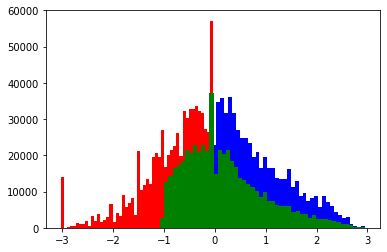

In [30]:
plt.hist(third.indice_socioeconomico_medio, density=False, bins = 50, color='red')
plt.hist(second.indice_socioeconomico_medio, density=False, bins = 50, color='blue')
plt.hist(first.indice_socioeconomico_medio, density=False, bins = 50, color='green')

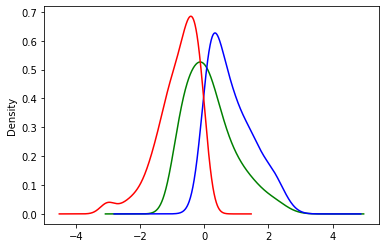

In [31]:
first.indice_socioeconomico_medio.plot.kde(bw_method=0.35, color='green')
second.indice_socioeconomico_medio.plot.kde(bw_method=0.35, color='blue')
third.indice_socioeconomico_medio.plot.kde(bw_method=0.35, color='red')

In [ ]:
clusters.inertia_

2312340.6539025162